# **SSBU CV3: Práca s datasetom v Pythone**

Datasety z verejne dostupných databáz je možné získavať aj priamo z jazyka Python. Pre načítanie datasetu použijeme databázu Kaggle.

---

## **1. Inštalácia potrebných knižníc**
Pre prácu s databázou **Kaggle** a jednoduché sťahovanie datasetov priamo z jazyka Python je vhodné nainštalovať knižnicu **kagglehub**.

Pre prácu s dátami v tabuľkovej forme pomocou **DataFrame** je potrebné mať nainštalovanú knižnicu **pandas**.

Pre vizualizáciu dát pomocou grafov je vhodné použiť knižnicu **matplotlib**.


In [3]:
# pip install kagglehub pandas matplotlib

---

## **2. Načítanie datasetu z databázy Kaggle**
Použijeme dataset [**remote-work-and-mental-health**](https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health) dostupný v databáze [**Kaggle**](https://www.kaggle.com/). Dataset obsahuje informácie o vplyve práce na diaľku na duševné zdravie človeka.

Dataset sa uloží na predvolenú lokalitu nastavenú knižnicou.


In [2]:
import os
import kagglehub

# download the dataser
dataset_path = kagglehub.dataset_download("waqi786/remote-work-and-mental-health")

print("Path:", dataset_path)

Path: C:\Users\alexa\.cache\kagglehub\datasets\waqi786\remote-work-and-mental-health\versions\1


---

## **3. Načítanie datasetu do Pandas DataFrame**
Dataset je vo formáte **CSV**, preto použijeme knižnicu **pandas** na jeho načítanie.

Na spájanie ciest v súborovom systéme je dobré používať metódu join z knižnice os - [Dokumentácia os.path.join](https://docs.python.org/3/library/os.path.html#os.path.join). Knižnica je vhodnejšia ako spájanie premenných typu string, pretože dáva pozor na správne oddelenie ciest podľa operačného systému.

Načítanie datasetu do **DataFrame** sa vykoná priamo pomocou funkcie `read_csv` z knižnice **pandas** - [Dokumentácia read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

Kontrola správneho mačítania datasetu sa vykoná pomocou metódy `head` - [Dokumentácia head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)



In [3]:
import pandas as pd

dataset_name = os.path.join(dataset_path, "Impact_of_Remote_Work_on_Mental_Health.csv")

df = pd.read_csv(dataset_name)
print(df.head())

  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2             

**Úloha:** Zobrazte posledných 10 riadkov datasetu - [Dokumentácia tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)


In [4]:
# TODO
print(df.tail(10))

     Employee_ID  Age             Gender         Job_Role    Industry  \
4990     EMP4991   58  Prefer not to say  Project Manager  Consulting   
4991     EMP4992   60             Female   Data Scientist          IT   
4992     EMP4993   55  Prefer not to say  Project Manager  Consulting   
4993     EMP4994   35         Non-binary        Marketing      Retail   
4994     EMP4995   40  Prefer not to say        Marketing          IT   
4995     EMP4996   32               Male            Sales  Consulting   
4996     EMP4997   39             Female            Sales  Healthcare   
4997     EMP4998   42             Female            Sales  Healthcare   
4998     EMP4999   27             Female            Sales  Healthcare   
4999     EMP5000   29               Male               HR          IT   

      Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
4990                   10        Onsite                     45   
4991                    9        Hybrid                     57  

----

## **4. Základná analýza datasetu**

Po načítaní datasetu je vhodné vykonať základnú analýzu údajov, aby sme overili správne načítanie a získali prehľad o dátach.

### **Zobrazenie základných štatistík**

Zobrazenie základných štatistík o datasete pre stĺpce s číselnými hodnotami sa vykoná pomocou metódy `describe` - [Dokumentácia describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)


In [5]:
print(df.describe())

               Age  Years_of_Experience  Hours_Worked_Per_Week  \
count  5000.000000          5000.000000            5000.000000   
mean     40.995000            17.810200              39.614600   
std      11.296021            10.020412              11.860194   
min      22.000000             1.000000              20.000000   
25%      31.000000             9.000000              29.000000   
50%      41.000000            18.000000              40.000000   
75%      51.000000            26.000000              50.000000   
max      60.000000            35.000000              60.000000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                 5000.000000               5000.000000   
mean                     7.559000                  2.984200   
std                      4.636121                  1.410513   
min                      0.000000                  1.000000   
25%                      4.000000                  2.000000   
50%                      8.

Zobrazenie základných štatistík o datasete pre všetky stĺpce sa vykoná pomocou metódy `info` - [Dokumentácia info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

**Úloha:** Skúste vypočítať medián pre všetky číselné stĺpce. Použite metódu median - [Dokumentácia median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html). Je potrebné zvoliť iba číselné stĺpce.

In [ ]:
# TODO

### **Kontrola chýbajúcich údajov**

Na kontrolu chýbajúcich údajov sa používa metóda `isnull` - [Dokumentácia isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html).
Táto metóda vráti hodnotu **True** pre každý riadok, ktorý obsahuje chýbajúce hodnoty.

Metóda `sum` vráti počet chýbajúcich hodnôt pre každý stĺpec - [Dokumentácia sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

In [6]:
print(df.isnull().sum())

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


**Úloha:** Skúste odstrániť všetky riadky s chýbajúcimi hodnotami pomocou met=ody `dropna`- [Dokumentácia dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) Výsledok operácie uložte do premennej `clean_df`.

In [7]:
# TODO
clean_df = df.dropna()

### **Najčastejšie regióny v údajoch**

Práca s konkrétnym stĺpcom sa vykonáva pomocou zápisu `názov_dataframe["názov_stĺpca"]`. Pozor na veľké a malé písmená.

Na zistenie najčastejšie sa vyskytujúcich hodnôt v stĺpci sa používa metóda `value_counts` - [Dokumentácia value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). Táto metóda vráti počet výskytov pre každú hodnotu v stĺpci.


In [8]:
print(df["Region"].value_counts())

Region
Oceania          867
Africa           860
Europe           840
Asia             829
South America    827
North America    777
Name: count, dtype: int64


**Úloha:** Zobrazte 5 najčastejšie sa vyskytujúcich fyzických aktivít. Použite kombináciu metód `value_counts` a `head`.

In [9]:
# TODO
print(df["Physical_Activity"].value_counts().head())

Physical_Activity
Weekly    1755
Daily     1616
Name: count, dtype: int64


### **Počet odpracovaných hodín za týždeň**

Na zistenie počtu sa použije metóda `value_counts` - [Dokumentácia value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

Pre zoradenie hodnôt podľa indexu sa použije metóda `sort_index` - [Dokumentácia sort_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html).

In [10]:
print(df["Hours_Worked_Per_Week"].value_counts().sort_index())

Hours_Worked_Per_Week
20    137
21    121
22    142
23    128
24    125
25    129
26    112
27    127
28    149
29    113
30    108
31    122
32    136
33    135
34    113
35    122
36    128
37    116
38    112
39    121
40    120
41    133
42    120
43    115
44    119
45    125
46    121
47    119
48    123
49    129
50    120
51    104
52    111
53    127
54    119
55    115
56    122
57    123
58    104
59    123
60    112
Name: count, dtype: int64


**Úloha:** Zoraďte počet odpracovaných hodín zostupne. Použite metódu `sort_values` - [Dokumentácia sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html), ktorá zoradí hodnoty podľa počtu výskytov.

In [ ]:
# TODO

---

## **5. Vizualizácia údajov**

Na vizualizáciu využijeme knižnicu **matplotlib**. Táto knižnica umožňuje vytvárať rôzne typy grafov a vizualizácií.

Metóda `figure` umožňuje nastaviť veľkosť grafu - [Dokumentácia figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html).

Metóda `plot` umožňuje vytvárať rôzne typy grafov - [Dokumentácia plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

Súčasti grafu (názvy osí, titulok) sa nastavujú pomocou metód `xlabel`, `ylabel`, `title` - [Dokumentácia xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [Dokumentácia ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html), [Dokumentácia title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html), a ďalších.

Pre zobrazenie grafov je potrebné použiť metódu `show` - [Dokumentácia show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).


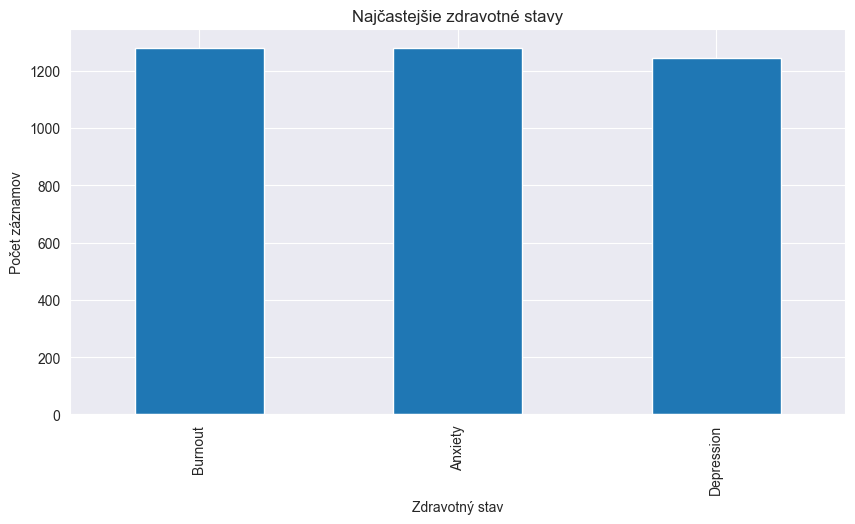

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df["Mental_Health_Condition"].value_counts().head(10).plot(kind='bar')

plt.title("Najčastejšie zdravotné stavy")
plt.xlabel("Zdravotný stav")
plt.ylabel("Počet záznamov")
plt.show()

**Úloha:** Vytvorte koláčový graf pre rôzne pracovné pozície a nastavte mu názov.

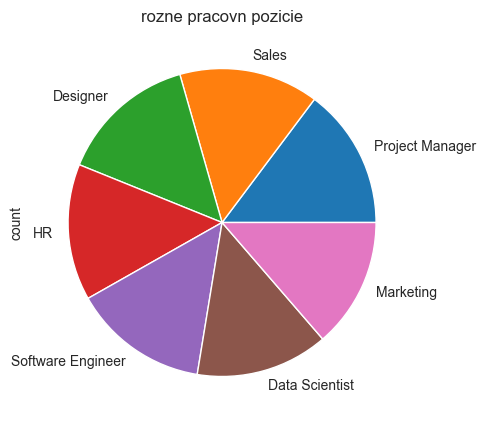

In [12]:
# TODO
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df["Job_Role"].value_counts().head(10).plot(kind='pie')

plt.title("rozne pracovn pozicie")
plt.show()

**Úloha:** Vytvorte horizontálny čiarový graf pre rôzne levely stresu na pozícii Software Engineer.

Hint:
Najskôr vyfiltrujte v DataFrame záznamy pre pozíciu Software Engineer a potom zistite počet záznamov pre jednotlivé levely stresu.
Filtrovanie sa vykoná pomocou zápisu `df[df["stĺpec"] == "hodnota"]`.


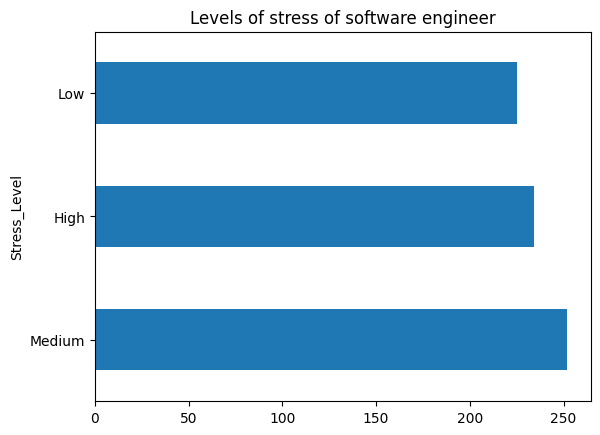

In [21]:
# TODO

df[df["Job_Role"] == "Software Engineer"]["Stress_Level"].value_counts().plot(kind='barh')

plt.title("Levels of stress of software engineer")
plt.show()


---

#### Ďalšie príklady spracovania tohto datasetu

https://www.kaggle.com/code/waqi786/remote-work-mental-health-eda

https://www.kaggle.com/code/pavankumar4757/remote-work-mental-health-analysis

https://www.kaggle.com/code/saifsalama/remote-work-mental-health-eda